In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, utils, callbacks,regularizers,optimizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Input,Conv2D,ReLU,MaxPool2D,Flatten,Dense,Dropout,Softmax

In [41]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
NUM_CLASSES = 100

In [42]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

y_train_cat = to_categorical(y_train, NUM_CLASSES)
y_test_cat  = to_categorical(y_test, NUM_CLASSES)

In [43]:
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_cat, test_size=0.10, random_state=42, stratify=y_train
)

In [44]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.12,
    height_shift_range=0.12,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='reflect'
)
datagen.fit(x_train_final)

In [45]:
def build_custom_cnn(input_shape=(32,32,3), num_classes=100, base_filters=64, weight_decay=1e-4):
    reg = regularizers.l2(weight_decay)
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(base_filters, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=reg)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(base_filters, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(base_filters*2, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(base_filters*2, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(base_filters*4, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(base_filters*4, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.4)(x)

    x = layers.GlobalAveragePooling2D()(x)     # reduces params vs Flatten + Dense
    x = layers.Dense(512, activation='relu', kernel_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name="CustomCNN")
    return model

Model: "CustomCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 1,333,924 (5.09 MB)

 Trainable params: 1,331,108 (5.08 MB)

 Non-trainable params: 2,816 (11.00 KB)

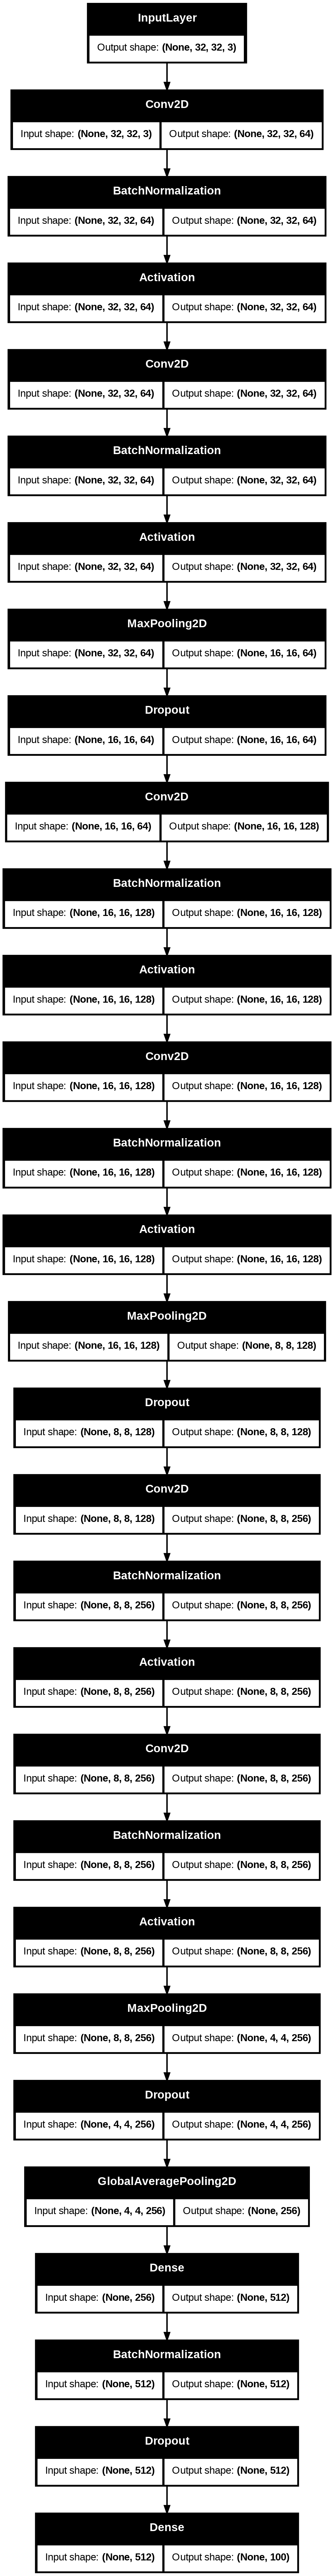

In [74]:
custom_model = build_custom_cnn()
custom_model.summary()
tf.keras.utils.plot_model(custom_model, to_file="custom_cnn.png", show_shapes=True)

In [66]:
custom_model = build_custom_cnn(input_shape=(32,32,3), num_classes=NUM_CLASSES)

custom_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy", tf.keras.metrics.TopKCategoricalAccuracy(k=5)]
)

In [47]:
checkpoint = callbacks.ModelCheckpoint("custom_cnn_best.h5",
                                       monitor='val_accuracy',
                                       save_best_only=True,
                                       verbose=1)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=1)

In [48]:
BATCH_SIZE = 128
EPOCHS = 60

train_gen = datagen.flow(x_train_final, y_train_final, batch_size=BATCH_SIZE)
steps_per_epoch = len(train_gen)

In [49]:
history = custom_model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, reduce_lr, early_stop],
    verbose=1
)

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1755858027.523712     101 service.cc:148] XLA service 0x7f88e801e3b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755858027.524666     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755858027.524687     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755858028.274564     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/352 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.0148 - loss: 5.8445 - top_k_categorical_accuracy: 0.0564   

I0000 00:00:1755858037.096371     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0529 - loss: 4.7859 - top_k_categorical_accuracy: 0.1917
Epoch 1: val_accuracy improved from -inf to 0.07160, saving model to custom_cnn_best.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.0529 - loss: 4.7849 - top_k_categorical_accuracy: 0.1919 - val_accuracy: 0.0716 - val_loss: 4.7301 - val_top_k_categorical_accuracy: 0.2676 - learning_rate: 0.0010
Epoch 2/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1368 - loss: 3.9029 - top_k_categorical_accuracy: 0.3881
Epoch 2: val_accuracy improved from 0.07160 to 0.16020, saving model to custom_cnn_best.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.1368 - loss: 3.9025 - top_k_categorical_accuracy: 0.3882 - val_accuracy: 0.1602 - val_loss: 3.8314 - val_top_k_categorical_accuracy: 0.4190 - learning_rate: 0.0010
Epoch 3/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2129 - loss: 3.4034 - top_k_categorical_accuracy: 0.5105
Epoch 3: val_accur

In [50]:
best_model = load_model("custom_cnn_best.h5")
test_loss, test_acc, test_top5 = best_model.evaluate(x_test, y_test_cat, batch_size=256, verbose=2)
print(f"Custom CNN — Test accuracy: {test_acc:.4f}, Top-5 accuracy: {test_top5:.4f}")

40/40 - 6s - 161ms/step - accuracy: 0.6556 - loss: 1.4924 - top_k_categorical_accuracy: 0.8962
Custom CNN — Test accuracy: 0.6556, Top-5 accuracy: 0.8962


In [67]:
custom_eval = custom_model.evaluate(x_test, y_test_cat, batch_size=256, verbose=2)

40/40 - 4s - 92ms/step - accuracy: 0.0100 - loss: 4.9138 - top_k_categorical_accuracy: 0.0509


In [51]:
# ---- VGG16-like ----
vgg_model = Sequential([
    Input((32,32,3)),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(2),

    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPool2D(2),

    Conv2D(256, 3, padding='same', activation='relu'),
    Conv2D(256, 3, padding='same', activation='relu'),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPool2D(2),

    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPool2D(2),

    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPool2D(2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,873,902 (175.00 MB)

 Trainable params: 15,291,300 (58.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,582,602 (116.66 MB)

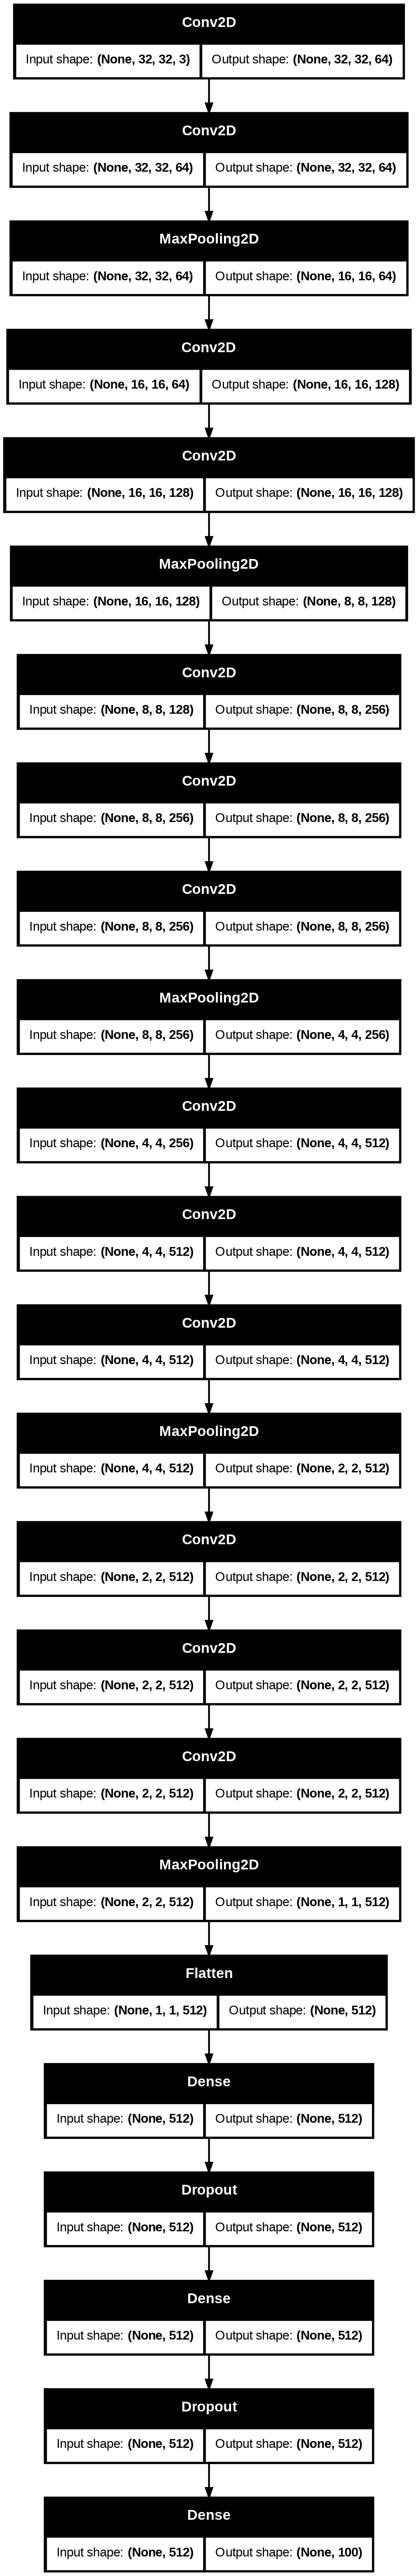

In [75]:
vgg_model.summary()
tf.keras.utils.plot_model(vgg_model, to_file="vgg16.png", show_shapes=True)

In [52]:
vgg_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy", metrics.TopKCategoricalAccuracy(k=5, name="top_5_acc")]
)

In [53]:
history_vgg = vgg_model.fit(
    x_train, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 107ms/step - accuracy: 0.0118 - loss: 4.5886 - top_5_acc: 0.0566 - val_accuracy: 0.0180 - val_loss: 4.4868 - val_top_5_acc: 0.0830
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0191 - loss: 4.4395 - top_5_acc: 0.0938 - val_accuracy: 0.0294 - val_loss: 4.3065 - val_top_5_acc: 0.1308
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0326 - loss: 4.2716 - top_5_acc: 0.1438 - val_accuracy: 0.0372 - val_loss: 4.1452 - val_top_5_acc: 0.1806
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0436 - loss: 4.1260 - top_5_acc: 0.1862 - val_accuracy: 0.0516 - val_loss: 3.9863 - val_top_5_acc: 0.2358
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.0569 - loss: 3.9902 - top_5_acc: 0.2313 - val_accuracy: 0.0670 - val_loss: 3.8638 - val_top_5_acc: 0.2686
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.0686 - loss: 3.8818 - top_5_acc: 0.2622 - val_accuracy: 0.091

In [64]:
vgg_eval = vgg_model.evaluate(x_test, y_test_cat, batch_size=256, verbose=2)

40/40 - 7s - 167ms/step - accuracy: 0.3120 - loss: 6.3352 - top_5_acc: 0.5730


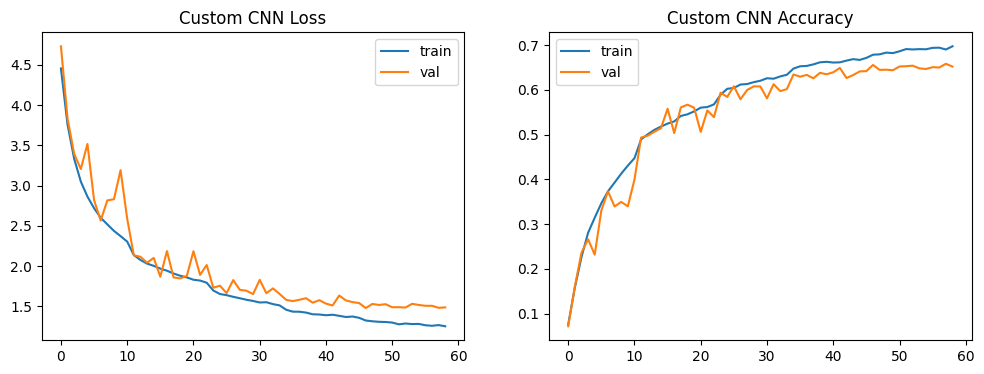

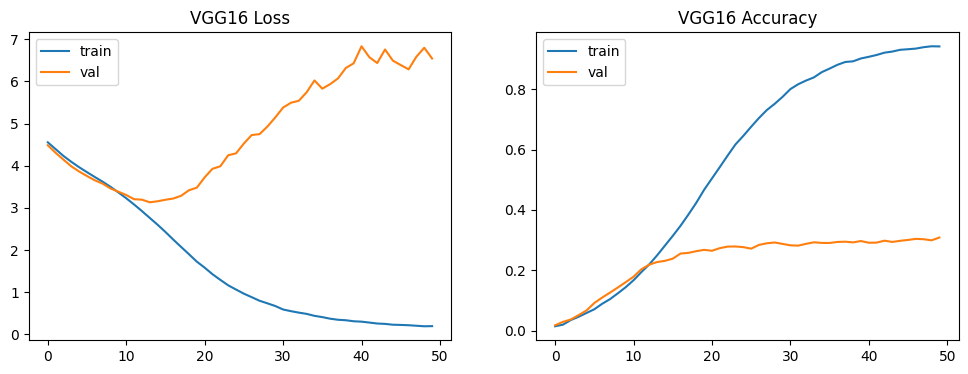

In [59]:
def plot_history(hist, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='val')
    plt.title(f"{title} Loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='val')
    plt.title(f"{title} Accuracy")
    plt.legend()
    plt.show()


plot_history(history, "Custom CNN")
plot_history(history_vgg, "VGG16")

In [72]:
results = pd.DataFrame([
{"Model": "Custom CNN","Test Accuracy": custom_eval[1]},
{"Model": "VGG16", "Test Accuracy": vgg_eval[1]}
])
results

,Model,Test Accuracy
0,Custom CNN,0.010
1,VGG16,0.312
